**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing necessary packages**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.svm import SVC



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/onlinefraud.csv")

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
23366,8,CASH_IN,28959.91,C2021264847,2782474.06,2811433.97,C2013342140,255994.57,363158.84,0,0


In [ ]:
f= df[df['isFraud'] ==1]
f

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Since the dataset is huge, taking a sample of the dataset, to get a balanced dataset

In [ ]:
import pandas as pd

# the DataFrame is divided into two groups based on the 'isFraud' column
g0 = df[df['isFraud'] == 0]
g1 = df[df['isFraud'] == 1]

# total is 16,000
num_g0 = int(8000 * len(g0) / (len(g0) + len(g1)))
num_g1 = 16000 - num_g0

sampleg0 = g0.sample(n=num_g0, replace=True, random_state=42)
sampleg1 = g1.sample(n=num_g1, replace=True, random_state=42)

balanced_df = pd.concat([sampleg0, sampleg1])

# Now 'balanced_df' contains a total of 16,000 samples, balanced based on the 'isFraud' column



In [ ]:
balanced_df['isFraud'].value_counts()

isFraud
1    8011
0    7989
Name: count, dtype: int64

In [ ]:
balanced_df.shape

(16000, 11)

In [ ]:
bdf=balanced_df
bdf.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1694553,False,False,False,False,False,False,False,False,False,False,False
4308043,False,False,False,False,False,False,False,False,False,False,False
4930379,False,False,False,False,False,False,False,False,False,False,False
2236606,False,False,False,False,False,False,False,False,False,False,False
1571764,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1030319,False,False,False,False,False,False,False,False,False,False,False
6168674,False,False,False,False,False,False,False,False,False,False,False
5987970,False,False,False,False,False,False,False,False,False,False,False
1005246,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
bdf.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
fraud_count = bdf['isFraud'].value_counts()
fraud_count

isFraud
1    8011
0    7989
Name: count, dtype: int64

In [ ]:
len(bdf)

16000

In [ ]:
t = pd.get_dummies(bdf['type'], drop_first=True)
bdf_new = pd.concat([bdf, t], axis=1)
bdf_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1694553,159,PAYMENT,7761.41,C1322676788,126330.00,118568.59,M805179360,0.00,0.00,0,0,False,False,True,False
4308043,307,PAYMENT,9363.17,C1025671823,427248.51,417885.34,M1162917018,0.00,0.00,0,0,False,False,True,False
4930379,350,PAYMENT,28035.27,C153907869,9890.00,0.00,M108610323,0.00,0.00,0,0,False,False,True,False
2236606,186,CASH_OUT,394781.26,C695870266,412.00,0.00,C374707826,37951.44,432732.71,0,0,True,False,False,False
1571764,155,CASH_OUT,166078.15,C111564550,0.00,0.00,C1379031360,20974596.81,21140674.96,0,0,True,False,False,False


In [ ]:
X = bdf_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = bdf_new['isFraud']
X.shape, y.shape

((16000, 11), (16000,))

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.svm import SVC


mlmodels = [
    DecisionTreeClassifier(),
    SVC(kernel='rbf', probability=True),
    MLPClassifier(max_iter=1000),
    RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=20)
]

for model in mlmodels:
    model.fit(X_train, y_train)
    print(f'{model}:')

    trainingpred = model.predict_proba(X_train)[:, 1]
    print('Training Accuracy:', ras(y_train, trainingpred))

    ypred = model.predict_proba(X_test)[:, 1]
    print('Validation Accuracy:', ras(y_test, ypred))
    print()


DecisionTreeClassifier():
Training Accuracy: 1.0
Validation Accuracy: 0.9922685603166889

SVC(probability=True):
Training Accuracy: 0.9610307985808254
Validation Accuracy: 0.9573181297312314

MLPClassifier(max_iter=1000):
Training Accuracy: 0.9511795773452094
Validation Accuracy: 0.9492871032710605

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=20):
Training Accuracy: 0.9999998883925688
Validation Accuracy: 0.9996544898951316



We see that training accuracy of Random Forest is very high..although Decision Tree gives an accuracy of 100 percent.

RandomForestClassifier offers the advantage of being less sensitive to hyperparameters and less prone to overfitting, making it a more robust choice for many classification tasks.

**Training RandomForest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42,n_estimators=20))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(n_estimators=20, random_state=42))])

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

rf_accuracy = pipeline.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {rf_accuracy}')

# Classification Report
print(classification_report(y_pred, y_test))

Random Forest Test Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2358
           1       1.00      0.99      0.99      2442

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800



**Confusion Matrix**

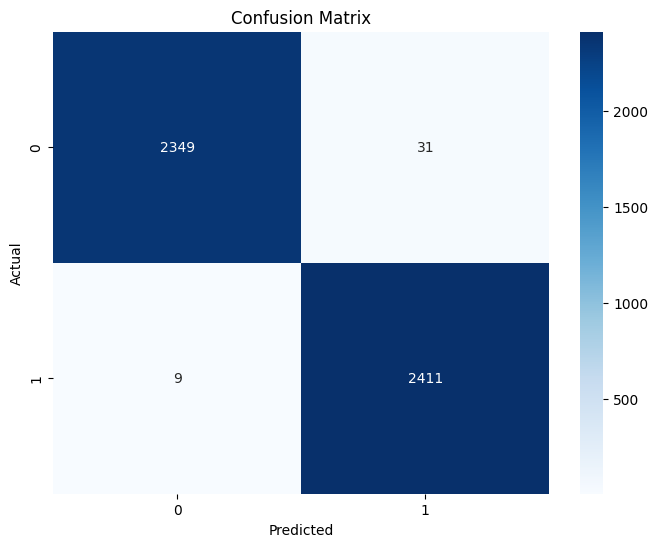

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Cross Validation**

In [ ]:
import numpy as np

cv_s = cross_val_score(pipeline, X, y, cv=5)

print(f"Cross-validation scores: {cv_s}")
print(f"Mean CV accuracy: {np.mean(cv_s):.2f}")

Cross-validation scores: [0.994375  0.99375   0.994375  0.9903125 0.99     ]
Mean CV accuracy: 0.99


In [ ]:
threshold = 0.5
ypred = (ypred > threshold).astype(int)

**Calculating Precision, Recall, f1score**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
p0 = precision_score(y_test, ypred, pos_label=0)
p1 = precision_score(y_test, ypred, pos_label=1)

r0 = recall_score(y_test, ypred, pos_label=0)
r1 = recall_score(y_test, ypred, pos_label=1)

f10 = f1_score(y_test, ypred, pos_label=0)
f11 = f1_score(y_test, ypred, pos_label=1)

In [ ]:
print("Precision for NonFraud Class: ", p0)
print("Precision for Fraud Class: ", p1)

print("Recall for NonFraud Class: ", r0)
print("Recall for Fraud Class: ", r1)

print("F1 Score for NonFraud Class: ", f10)
print("F1 Score Fraud Class: ", f11)

Precision for NonFraud Class:  0.9961880559085133
Precision for Fraud Class:  0.988519885198852
Recall for NonFraud Class:  0.9882352941176471
Recall for Fraud Class:  0.9962809917355372
F1 Score for NonFraud Class:  0.9921957392955072
F1 Score Fraud Class:  0.9923852644577074


Evaluating how model performs for each class independently`

In [ ]:
from tabulate import tabulate

data = [
    ["NonFraud Class", p0, r0, f10],
    ["Fraud Class", p1, r1, f11]
]

heading = ["Class", "Precision", "Recall", "F1 Score"]

# Print the table
print(tabulate(data, headers=heading, tablefmt="grid"))


+----------------+-------------+----------+------------+
| Class          |   Precision |   Recall |   F1 Score |
+================+=============+==========+============+
| NonFraud Class |    0.996188 | 0.988235 |   0.992196 |
+----------------+-------------+----------+------------+
| Fraud Class    |    0.98852  | 0.996281 |   0.992385 |
+----------------+-------------+----------+------------+


**ROC_AUC Curve**

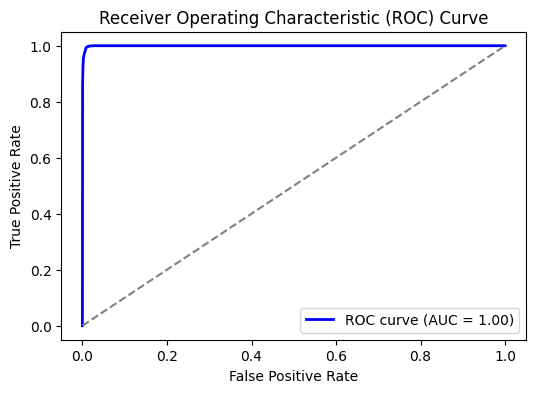

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Increasing size of dataset to check model's performance

In [ ]:
import pandas as pd

# the DataFrame is divided into two groups based on the 'isFraud' column
g0 = df[df['isFraud'] == 0]
g1 = df[df['isFraud'] == 1]

# total is 16,000
num_g0 = int(8000 * len(g0) / (len(g0) + len(g1)))
num_g1 = 16000 - num_g0

sampleg0 = g0.sample(n=num_g0, replace=True, random_state=42)
sampleg1 = g1.sample(n=num_g1, replace=True, random_state=42)

balanced_df = pd.concat([sampleg0, sampleg1])

# Now 'balanced_df' contains a total of 16,000 samples, balanced based on the 'isFraud' column

In [ ]:
balanced_df['isFraud'].value_counts()

isFraud
1    8011
0    7989
Name: count, dtype: int64

In [ ]:
bdf=balanced_df

In [ ]:
t = pd.get_dummies(bdf['type'], drop_first=True)
bdf_new = pd.concat([bdf, t], axis=1)
bdf_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1694553,159,PAYMENT,7761.41,C1322676788,126330.00,118568.59,M805179360,0.00,0.00,0,0,False,False,True,False
4308043,307,PAYMENT,9363.17,C1025671823,427248.51,417885.34,M1162917018,0.00,0.00,0,0,False,False,True,False
4930379,350,PAYMENT,28035.27,C153907869,9890.00,0.00,M108610323,0.00,0.00,0,0,False,False,True,False
2236606,186,CASH_OUT,394781.26,C695870266,412.00,0.00,C374707826,37951.44,432732.71,0,0,True,False,False,False
1571764,155,CASH_OUT,166078.15,C111564550,0.00,0.00,C1379031360,20974596.81,21140674.96,0,0,True,False,False,False


In [ ]:
X = bdf_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = bdf_new['isFraud']
X.shape, y.shape

((16000, 11), (16000,))

In [ ]:
#Train a machine learning model with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42,n_estimators=20))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(n_estimators=20, random_state=42))])

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

rf_accuracy = pipeline.score(X_test, y_test)
print(f'RandomForest Test Accuracy: {rf_accuracy}')

# Classification Report
print(classification_report(y_pred, y_test))

RandomForest Test Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2358
           1       1.00      0.99      0.99      2442

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800



No change in accuracy

In [ ]:
#Trying on Imbalanced dataset

In [ ]:
import pandas as pd
# Separate the DataFrame into two groups based on the 'isFraud' column
g0 = df[df['isFraud'] == 0]
g1 = df[df['isFraud'] == 1]

# total is 16,000
numg0 = int(2000 * len(g0) / (len(g0) + len(g1)))
numg1 = 16000 - numg0

# Sample from each group separately
sampleg0 = g0.sample(n=numg0, replace=True, random_state=42)
sampleg1 = g1.sample(n=numg1, replace=True, random_state=42)

# Concatenate the sampled groups to obtain a balanced dataset
imbalanced_df = pd.concat([sampleg0, sampleg1])


In [ ]:
imbalanced_df['isFraud'].value_counts()

isFraud
1    14003
0     1997
Name: count, dtype: int64

In [ ]:
ibdf = imbalanced_df

In [ ]:
t = pd.get_dummies(ibdf['type'], drop_first=True)
ibdf_new = pd.concat([ibdf, t], axis=1)
ibdf_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1694553,159,PAYMENT,7761.41,C1322676788,126330.00,118568.59,M805179360,0.00,0.00,0,0,False,False,True,False
4308043,307,PAYMENT,9363.17,C1025671823,427248.51,417885.34,M1162917018,0.00,0.00,0,0,False,False,True,False
4930379,350,PAYMENT,28035.27,C153907869,9890.00,0.00,M108610323,0.00,0.00,0,0,False,False,True,False
2236606,186,CASH_OUT,394781.26,C695870266,412.00,0.00,C374707826,37951.44,432732.71,0,0,True,False,False,False
1571764,155,CASH_OUT,166078.15,C111564550,0.00,0.00,C1379031360,20974596.81,21140674.96,0,0,True,False,False,False


In [ ]:
X = ibdf_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = ibdf_new['isFraud']
X.shape, y.shape

((16000, 11), (16000,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42,n_estimators=20))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(n_estimators=20, random_state=42))])

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

rf_accuracy = pipeline.score(X_test, y_test)
print(f'RandomForest Test Accuracy: {rf_accuracy}')

# Classification Report
print(classification_report(y_pred, y_test))

RandomForest Test Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2358
           1       1.00      0.99      0.99      2442

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800



No change in accuracy

**Hyperparameter Tuning using Randomised Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Hyperparameter grid
param_dist_rforest = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist_rforest, n_iter=100, cv=5, random_state=42)

# Best hyperparameters
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print(f'Accuracy after tuning: {accuracy:.4f}')


Accuracy after tuning: 0.9935


In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:")
print(best_params)

Best Parameters:
{'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


200 trees are required for a better/ improved performance

**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectFromModel

rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)

feature_importances = rf_clf.feature_importances_

print("Feature Importance Scores:")
for i, score in enumerate(feature_importances):
    print(f"Feature {i}: {score}")

sfm = SelectFromModel(rf_clf, threshold=0.1)  # threshold= 0.1
sfm.fit(X_train, y_train)

X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Re-train the classifier using only selected features
rf_clf_selected = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf_selected.fit(X_train_selected, y_train)

# Evaluate the model with selected features
accuracy_selected = rf_clf_selected.score(X_test_selected, y_test)
print(f"Accuracy with selected features: {accuracy_selected:.2f}")


Feature Importance Scores:
Feature 0: 0.057936563050975984
Feature 1: 0.1481674615471157
Feature 2: 0.3056304571201872
Feature 3: 0.18249592632262815
Feature 4: 0.052834141942860055
Feature 5: 0.060609135151511145
Feature 6: 0.00012072041382104928
Feature 7: 0.039994798834817755
Feature 8: 0.0001476198364377361
Feature 9: 0.06528856191237747
Feature 10: 0.08677461386726786
Accuracy with selected features: 0.99


In [ ]:
selected_features_mask = sfm.get_support()

column_names = X_train.columns.tolist()

# Printing selected features
selected_features_indices = np.where(selected_features_mask)[0]
print("Selected Features:")
for feature_index in selected_features_indices:
    print(f"Feature: {column_names[feature_index]}")


Selected Features:
Feature: amount
Feature: oldbalanceOrg
Feature: newbalanceOrig
